<a><img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" align="center"></a>

<h1>Analyzing Where Do People Drink?  </h1>
<h2>Description</h2>

This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.

You will need the following libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

<b>1.0 Importing the Data</b>

Load the csv:

In [2]:
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')


We use the method  <code>head()</code>  to display the first 5 columns of the dataframe:

In [3]:
df.to_csv(r"C:\Users\PRADYUM\Desktop\IBM_data_analytics.csv")

In [4]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b>Question 1</b>:  Display the data types of each column using the attribute dtype.

In [5]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [108]:
df.shape

(193, 6)

<b>Question 2</b> use the method <code>groupby</code> to get the number of wine servings per continent:

In [8]:
df.groupby

<bound method NDFrame.groupby of                   country  beer_servings  spirit_servings  wine_servings  \
0             Afghanistan              0                0              0   
1                 Albania             89              132             54   
2                 Algeria             25                0             14   
3                 Andorra            245              138            312   
4                  Angola            217               57             45   
5       Antigua & Barbuda            102              128             45   
6               Argentina            193               25            221   
7                 Armenia             21              179             11   
8               Australia            261               72            212   
9                 Austria            279               75            191   
10             Azerbaijan             21               46              5   
11                Bahamas            122              1

<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:

In [9]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [12]:
df.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


<b>Question 4:</b> Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.

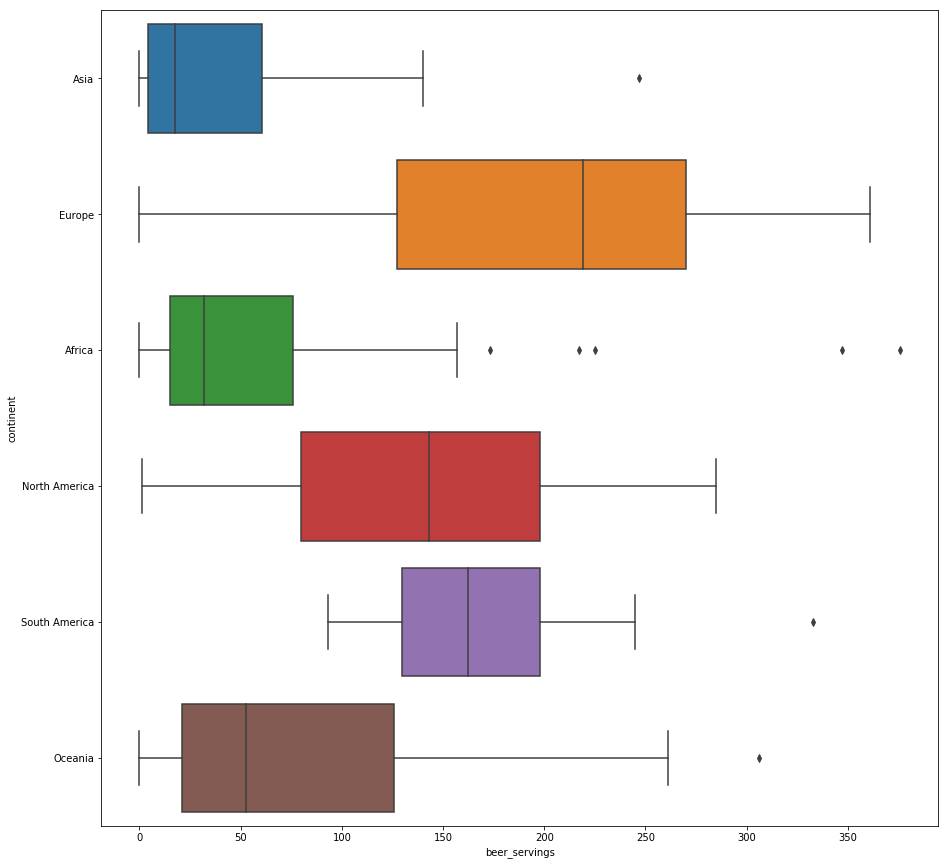

In [22]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.boxplot(x = 'beer_servings', y='continent', data=df)

<b>Question 5</b>: Use the function <code> regplot</code> in the seaborn library to determine if the number of wine servings is
negatively or positively correlated with the number of beer servings.

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


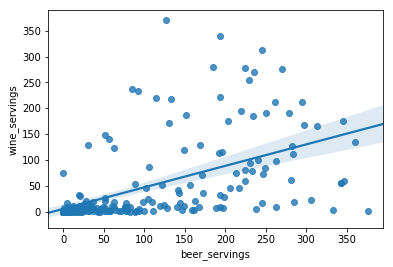

In [53]:
import seaborn as sns 
sns.regplot(x = 'beer_servings', y='wine_servings', data=df)

df1 = df.loc[:, ['beer_servings', 'wine_servings']]

df1.corr()

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:


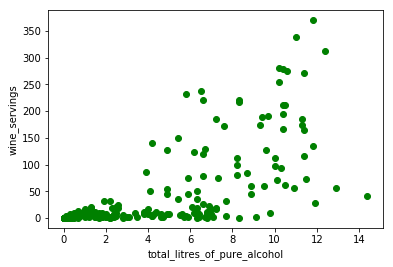

In [62]:
from sklearn.linear_model import LinearRegression

plt.scatter(df.total_litres_of_pure_alcohol, df.wine_servings,  color='green')
plt.xlabel("total_litres_of_pure_alcohol")
plt.ylabel("wine_servings")
plt.show()

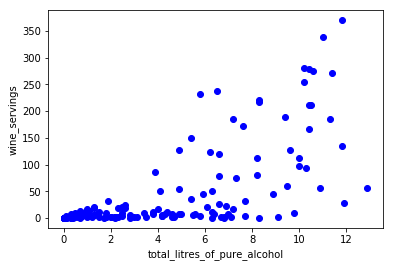

In [63]:
df2 = df.loc[:, ['total_litres_of_pure_alcohol', 'wine_servings']]

plt.scatter(train.total_litres_of_pure_alcohol, train.wine_servings,  color='blue')
plt.xlabel("total_litres_of_pure_alcohol")
plt.ylabel("wine_servings")
plt.show()

In [85]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [86]:
from sklearn.metrics import r2_score

X = np.array(df[['total_litres_of_pure_alcohol']])
Y = np.array(df[['wine_servings']])

regr.fit(X,Y)
print ('Coefficients: ', regr.coef_)
y_hatt = regr.predict(X)

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, Y))
r2_score(Y, y_hatt)

Coefficients:  [[14.10065737]]
Residual sum of squares: 1399412.16
Variance score: 0.45


0.4456875459787605

### Question 7
Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:

In [92]:
from sklearn.linear_model import Lasso, LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state=25)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#Model Validation
r2_score(y_test, y_pred)

0.5740348807811937

In [131]:
rlr = RidgeCV(cv = 5)
rlr.fit(X_train, y_train)
y_pred = rlr.predict(X_test)

#Model Validation
r2_score(y_test, y_pred, multioutput='raw_values')

C:\Users\PRADYUM\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0.57293107])

In [98]:
lr = Lasso(alpha= 0.6, max_iter=5000, random_state=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred, multioutput='raw_values')

array([0.57337395])

In [130]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=10, random_state=7).fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Lasso_Cross_Val Score: %0.02f%%' %(reg.score(X_test, y_test)*100))
r2_score(y_test, y_pred, multioutput='raw_values')

Lasso_Cross_Val Score: 57.38%


C:\Users\PRADYUM\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.57382244])

<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple contains the model constructor

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [125]:
pipe.fit(X_train,y_train)
ypipe=pipe.predict(X_test)
r2_score(y_test, ypipe, multioutput='raw_values')

array([0.61408178])

<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$

In [129]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

#Model Validation
r2_score(y_test, y_pred, multioutput='raw_values')

array([0.57397989])

<b>Question 10 </b>: Perform a 2nd order polynomial transform on both the training data and testing data.  Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the $R^{2}$ utilizing the test data provided. Take a screen-shot of your code and the $R^{2}$. 

In [132]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X_training = poly.fit_transform(X_train)

X_testing = poly.fit_transform(X_test)

y_training = poly.fit_transform(y_train)

y_testing = poly.fit_transform(y_test)

ridg = Ridge(alpha = 0.5)
ridg.fit(X_training, y_training)
y_pred = ridg.predict(X_testing)


In [136]:
r2_score(y_testing, y_pred)

0.7470038371632649

<a href="https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/share-notebooks.html\" > CLICK HERE </a>  to see how to share your notebook

<b>Sources</b>

<a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/> Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?</a> by By Mona Chalabi , you can download the dataset <a href=https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption>here</a>.